# Thompson Sampling

Thompson Sampling is a probabilistic algorithm used in reinforcement learning and online decision-making problems. It is particularly useful in the multi-armed bandit problem, where the goal is to maximize the cumulative reward over a series of trials by choosing from multiple options, each with an unknown probability of success.

Here’s a high-level overview of how Thompson Sampling works:

1. **Initialize Priors:** Start with a prior distribution for each arm (option). Commonly, Beta distributions are used for Bernoulli rewards, with parameters \((\alpha, \beta)\) initialized to (1,1) for each arm, representing a uniform prior.

2. **Select an Arm:** For each arm, sample a value from its current posterior distribution. Choose the arm with the highest sampled value.

3. **Update Posterior:** After choosing an arm and observing the reward, update the posterior distribution for that arm. For Beta distributions, if the chosen arm produces a success, increment \(\alpha\) by 1; if it produces a failure, increment \(\beta\) by 1.

4. **Repeat:** Repeat the process of selecting an arm and updating the posterior distribution for a number of trials.

### Steps in Detail

1. **Initialization:**
   - For each arm \(i\), set \(\alpha_i = 1\) and \(\beta_i = 1\) (assuming a Beta distribution for the Bernoulli rewards).

2. **Arm Selection:**
   - For each arm \(i\), draw a sample \(\theta_i\) from the Beta distribution \(Beta(\alpha_i, \beta_i)\).
   - Select the arm \(A_t = \arg\max_{i} \theta_i\).

3. **Update:**
   - Observe the reward \(r_t\) (either 0 or 1 for Bernoulli rewards).
   - Update the parameters of the Beta distribution for the selected arm \(A_t\):
     - If \(r_t = 1\), increment \(\alpha_{A_t}\) by 1.
     - If \(r_t = 0\), increment \(\beta_{A_t}\) by 1.

### Advantages

- **Balancing Exploration and Exploitation:** Thompson Sampling naturally balances exploration (trying out different arms to learn about them) and exploitation (choosing the best-known arm to maximize rewards).
- **Simplicity and Efficiency:** The algorithm is relatively simple to implement and computationally efficient.
- **Theoretical Guarantees:** It has strong theoretical guarantees in terms of regret bounds, making it a robust choice for various applications.

### Applications

- **A/B Testing:** Choosing the best version of a web page or advertisement.
- **Clinical Trials:** Allocating patients to different treatments to find the most effective one.
- **Recommendation Systems:** Serving the most relevant content or products to users.



## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Visualising the results - Histogram

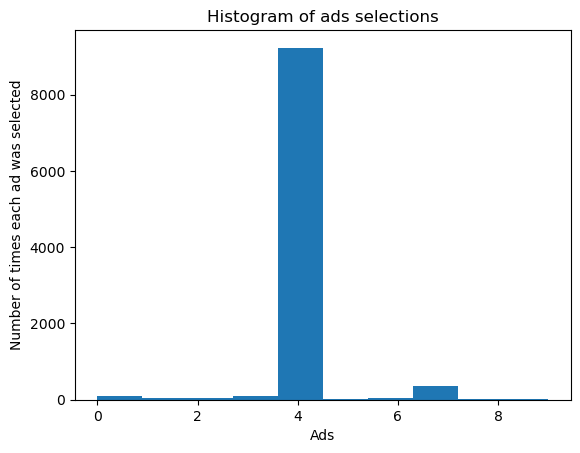

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()